In [80]:
import  pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [81]:
df = pd.read_csv('Customer.csv') # importing the dataset

In [82]:
df.isnull().sum()    # there are no null values at all

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [83]:
transform_data=df[['Gender',
                     'Item Purchased',
                     'Category',
                     'Location',
                     'Size',
                     'Color',
                     'Season',
                     'Subscription Status',
                     'Payment Method',
                     'Shipping Type',
                     'Discount Applied',
                     'Promo Code Used',
                     'Preferred Payment Method',
                     'Frequency of Purchases']].copy()

# the following code is to check the number of unique values in each column
# and to check the unique values in each column

#displays the number of unique values in these columns
for col in transform_data.columns:
    print(col,end=f" : {len(transform_data[col].unique())}\n")

Gender : 2
Item Purchased : 25
Category : 4
Location : 50
Size : 4
Color : 25
Season : 4
Subscription Status : 2
Payment Method : 6
Shipping Type : 6
Discount Applied : 2
Promo Code Used : 2
Preferred Payment Method : 6
Frequency of Purchases : 7


In [84]:
#Removing Outliers using Z Score threshold
data = df.copy(deep=True) # making a copy of the original data
 
# adding Z score columns to the data
data['Age Z_Score']=stats.zscore(data['Age']).abs() 
data['Purchase Amount (USD) Z_Score']=stats.zscore(data['Purchase Amount (USD)']).abs()
data['Review Rating Z_Score']=stats.zscore(data['Review Rating']).abs()
data['Previous Purchases Z_Score']=stats.zscore(data['Previous Purchases']).abs()

threshold = 3; # setting the threshold to 3

# removing the outliers
clean_data = data[data['Age Z_Score']<=threshold]
clean_data = data[data['Purchase Amount (USD) Z_Score']<=threshold]
clean_data = data[data['Review Rating Z_Score']<=threshold]
clean_data = data[data['Previous Purchases Z_Score']<=threshold]

print(data.shape)
print(clean_data.shape)# the shape of the data after removing the outliers

(3900, 23)
(3900, 23)


There are no outliers


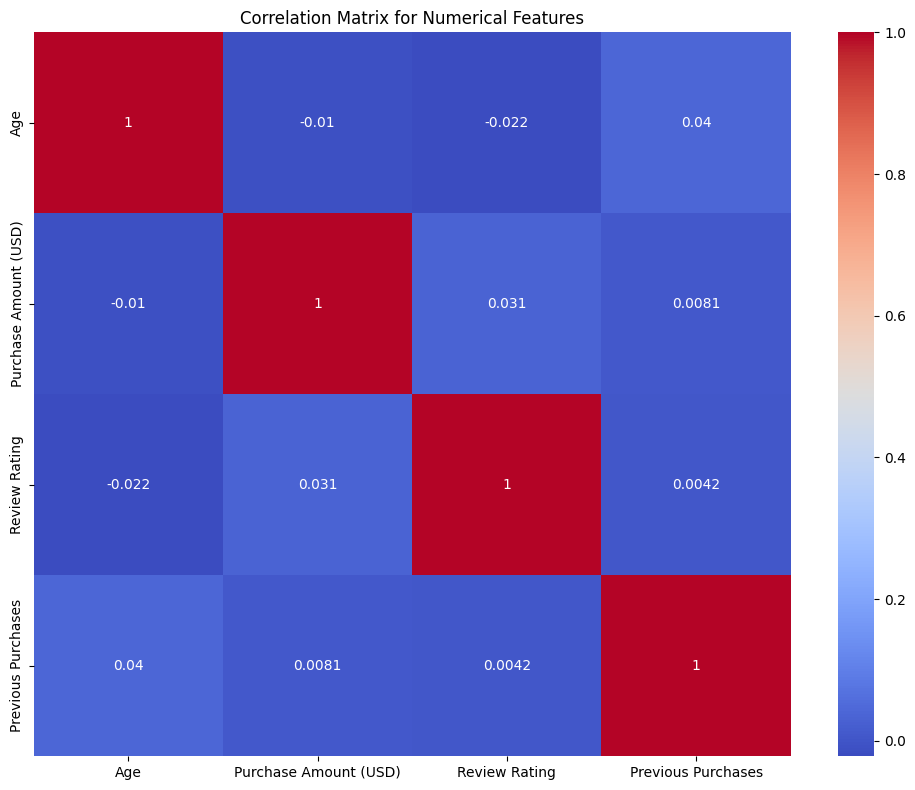

In [85]:
import seaborn as sns


# Select only numerical columns 
numerical_data = df.select_dtypes(exclude=['object']).drop(columns=['Customer ID'])

# List of numerical columns
num_cols = list(numerical_data.columns)

# Create correlation matrix heatmap
fig, ax = plt.subplots(figsize=(10,8))
corr_mat = numerical_data[num_cols].corr()
sns.heatmap(corr_mat, 
            xticklabels=num_cols,
            yticklabels=num_cols,
            cmap='coolwarm',
            annot=True,
            ax=ax)

ax.set_title("Correlation Matrix for Numerical Features")
fig.tight_layout()  
plt.show()

In [86]:

numerical_data = df.select_dtypes(exclude=['object']).drop(columns=['Customer ID'])
#This variable is categorical presenting the customer’s ID and has very little effect on the analysis, so it is dropped from the analysis.

# List of numerical columns
num_cols = list(numerical_data.columns)




In [87]:


# Scale numerical features
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)
numerical_data_scaled

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025
...,...,...,...,...
3895,-0.267563,-1.341267,0.628448,0.460252
3896,0.521618,-0.454531,1.047366,1.083293
3897,0.127028,-1.130139,-1.186862,-0.093563
3898,-0.004502,0.727784,0.069891,-0.093563


In [88]:
from sklearn.preprocessing import LabelEncoder
# Define high vs low cardinality threshold 
high_cardinality = 3
df.drop('Item Purchased', axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)
df.drop('Shipping Type', axis=1, inplace=True)
df.drop('Preferred Payment Method', axis=1, inplace=True)
df.drop('Payment Method', axis=1, inplace=True)
df.drop('Category', axis=1, inplace=True)
df.drop('Color', axis=1, inplace=True)
df.drop('Season', axis=1, inplace=True)

# Label encoding
df['Size'] = df['Size'].map({'S' : 1, 'M' : 2, 'L' : 3, 'XL' : 4})
df['Frequency of Purchases'] = df['Frequency of Purchases'].map({'Bi-Weekly': 6, 'Weekly': 5, 'Fortnightly': 4, 'Monthly' : 3, 'Every 3 Months' : 2, "Quarterly" : 2, "Annually" : 1}) # mapping the values to numerical values

# Discount, Promo code and subscription status are mapped as they are binary
df['Discount Applied'] = df['Discount Applied'].map({'Yes':1, 'No':0})
df.drop('Promo Code Used', axis=1, inplace=True) # dropping the column as it is not needed same as the Discount Applied column
df['Subscription Status'] = df['Subscription Status'].map({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})


df

,Customer ID,Age,Gender,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Frequency of Purchases
0,1,55,1,53,3,3.1,1,1,14,4
1,2,19,1,64,3,3.1,1,1,2,4
2,3,50,1,73,1,3.1,1,1,23,5
3,4,21,1,90,2,3.5,1,1,49,5
4,5,45,1,49,2,2.7,1,1,31,1
...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,28,3,4.2,0,0,32,5
3896,3897,52,0,49,3,4.5,0,0,41,6
3897,3898,46,0,33,3,2.9,0,0,24,2
3898,3899,44,0,77,1,3.8,0,0,24,5


In [89]:
# df[numerical_data.columns] = numerical_data_scaled
df.drop('Customer ID', axis=1, inplace=True)

In [90]:
df

,Age,Gender,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Frequency of Purchases
0,55,1,53,3,3.1,1,1,14,4
1,19,1,64,3,3.1,1,1,2,4
2,50,1,73,1,3.1,1,1,23,5
3,21,1,90,2,3.5,1,1,49,5
4,45,1,49,2,2.7,1,1,31,1
...,...,...,...,...,...,...,...,...,...
3895,40,0,28,3,4.2,0,0,32,5
3896,52,0,49,3,4.5,0,0,41,6
3897,46,0,33,3,2.9,0,0,24,2
3898,44,0,77,1,3.8,0,0,24,5


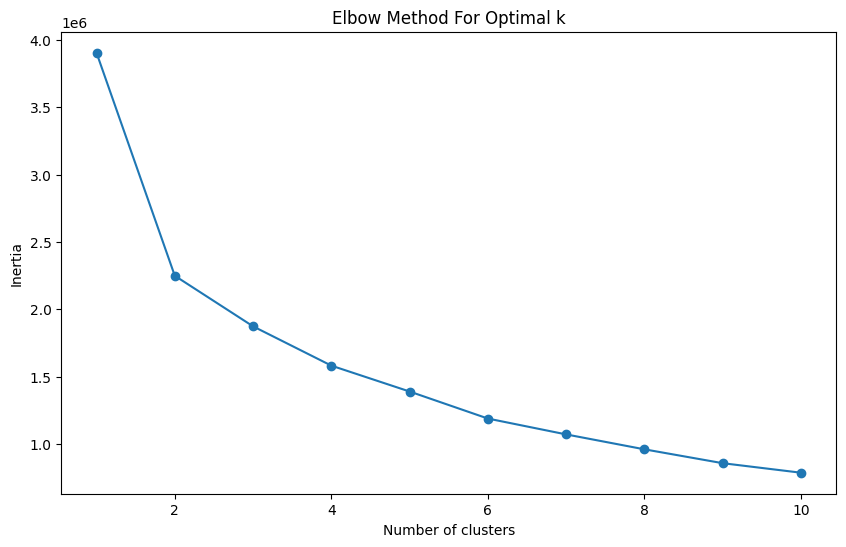

In [91]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Using the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [92]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform

# Applying K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)
df['Cluster'] = kmeans.labels_

# Silhouette Coefficient
silhouette = silhouette_score(df[numerical_data.columns], df['Cluster'])

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df[numerical_data.columns], df['Cluster'])

# Dunn Index - Calculation requires distance matrix
def dunn_index(data, labels):
    distances = pdist(data)
    distance_matrix = squareform(distances)
    unique_clusters = np.unique(labels)
    
    min_intercluster = np.inf
    max_intracluster = 0
    
    for i in unique_clusters:
        for j in unique_clusters:
            if i != j:
                data_i = data[labels == i]
                data_j = data[labels == j]
                intercluster_distance = np.min(distance_matrix[labels == i, :][:, labels == j])
                min_intercluster = min(min_intercluster, intercluster_distance)
    
    for k in unique_clusters:
        data_k = data[labels == k]
        if data_k.shape[0] > 1:  # Avoid division by zero
            intracluster_distance = np.max(pdist(data_k))
            max_intracluster = max(max_intracluster, intracluster_distance)
    
    return min_intercluster / max_intracluster

dunn = dunn_index(df[numerical_data.columns].values, df['Cluster'].values)

print(f"Silhouette Coefficient: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Dunn Index: {dunn}")

Silhouette Coefficient: 0.25621662143212615
Davies-Bouldin Index: 1.4447464973233446
Dunn Index: 0.020980360927188888


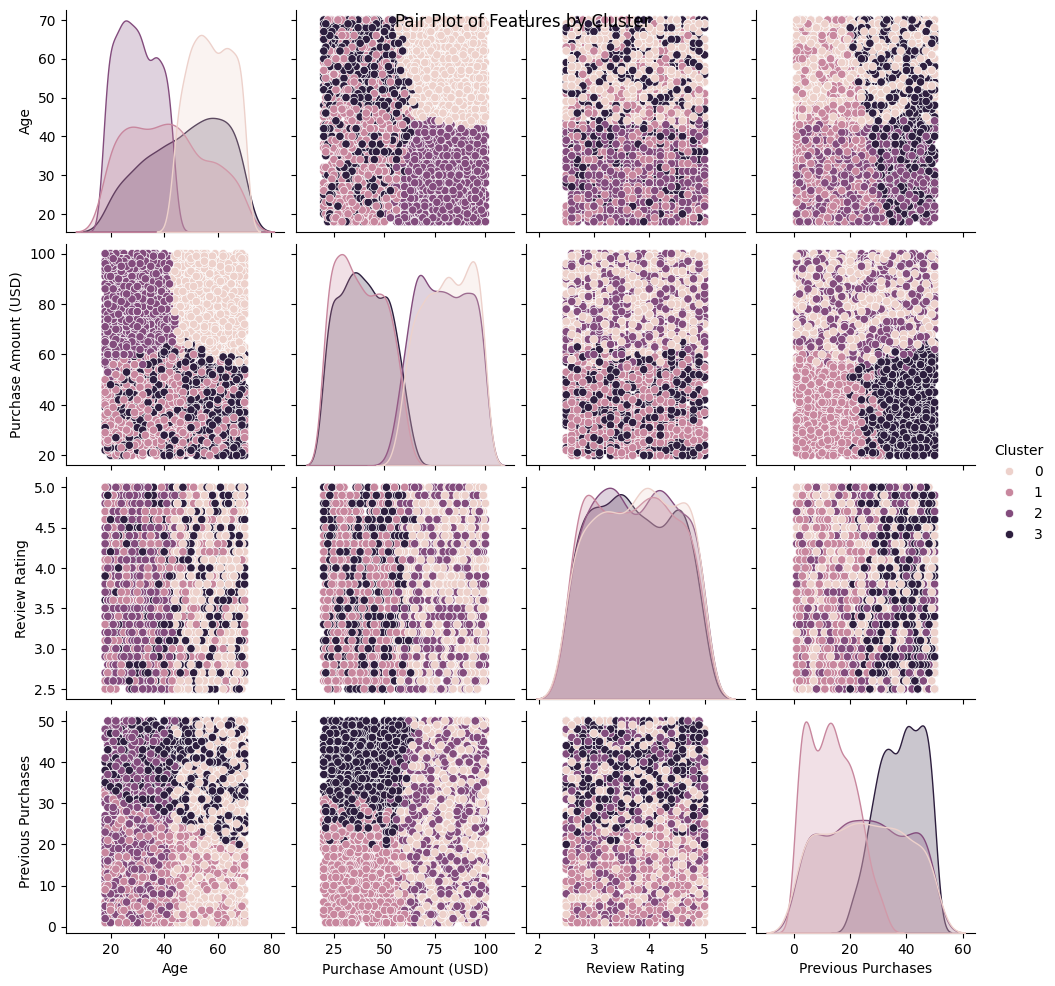

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Cluster' is the column with cluster labels from K-means
sns.pairplot(df, hue='Cluster', vars=numerical_data.columns)
plt.suptitle('Pair Plot of Features by Cluster', verticalalignment='top')
plt.show()


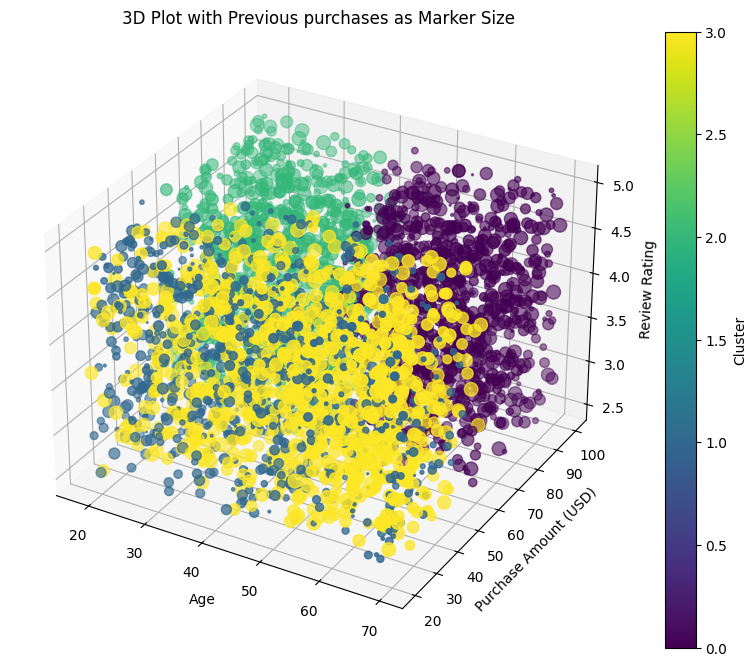

In [95]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], df['Purchase Amount (USD)'], df['Review Rating'], c=df['Cluster'], cmap='viridis', s=100*df['Previous Purchases']/df['Previous Purchases'].max())  # Scale marker size by Feature4

# Color bar and labels
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster')
ax.set_xlabel('Age')
ax.set_ylabel('Purchase Amount (USD)')
ax.set_zlabel('Review Rating')

plt.title('3D Plot with Previous purchases as Marker Size')
plt.show()


In [94]:
numerical_data.columns

Index(['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'], dtype='object')

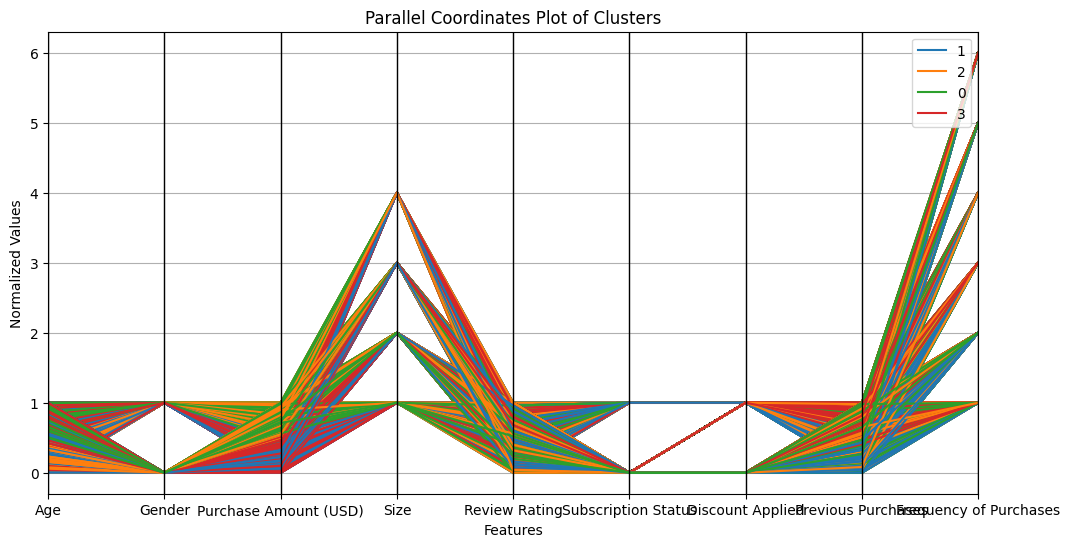

In [96]:
from pandas.plotting import parallel_coordinates

# Normalize the data for better visualization
df_normalized = df.copy()
features = numerical_data.columns
df_normalized[features] = (df[features] - df[features].min()) / (df[features].max() - df[features].min())
df_normalized['Cluster'] = df['Cluster']

# Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(df_normalized, 'Cluster', color=sns.color_palette(n_colors=df['Cluster'].nunique()))
plt.title('Parallel Coordinates Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.grid(True)
plt.show()
